In [1]:
%pylab inline

import pickle

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Built through a combination of BoxOfficeMojo and The Numbers

In [2]:
f = open('allofit.pkl', 'rb')
allofit = pickle.load(f)
f.close()

This is:
* Name
* Budget (if available)
* DataFrame of BoxOffice Info

In [3]:
for val in allofit[0]:
    print(type(val))

<class 'str'>
<class 'float'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
print(allofit[90])

('The Rite', 37000000.0,       Rank  WeeklyGross  PctChangeWkGross  Theaters  DeltaTheaters  AvgRev  \
Week                                                                         
1        1     18112223               NaN      2985            NaN    6068   
2        7      7493714             -58.6      2985            NaN    2510   
3       12      4656448             -37.9      2207         -778.0    2110   
4       16      1568793             -66.3      1048        -1159.0    1497   
5       21       633369             -59.6       545         -503.0    1162   
6       32       207759             -67.2       201         -344.0    1034   
7       46        76157             -63.3        85         -116.0     896   
8       35       158708             108.0       202          117.0     786   
9       42       104842             -33.9       155          -47.0     676   
10      56        35620             -66.0        72          -83.0     495   

      GrossToDate  Week   Thursday  
W

In [5]:
test = allofit[2][2]
test

,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,Thursday
Week,,,,,,,,,
1,2,15672286,NaN,2931,NaN,5347,15672286,1,2017-02-12
2,8,7750932,-50.5,2931,NaN,2644,23423218,2,2017-02-19
3,12,3186256,-58.9,1560,-1371.0,2042,26609474,3,2017-02-26
4,19,865824,-72.8,719,-841.0,1204,27475298,4,2017-03-05
5,34,168931,-80.5,174,-545.0,971,27644229,5,2017-03-12
6,47,60459,-64.2,76,-98.0,796,27704688,6,2017-03-19
7,36,88330,46.1,116,40.0,761,27793018,7,2017-03-26


In [6]:
pd.DatetimeIndex(test['Thursday']).week

Int64Index([6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Thursday')

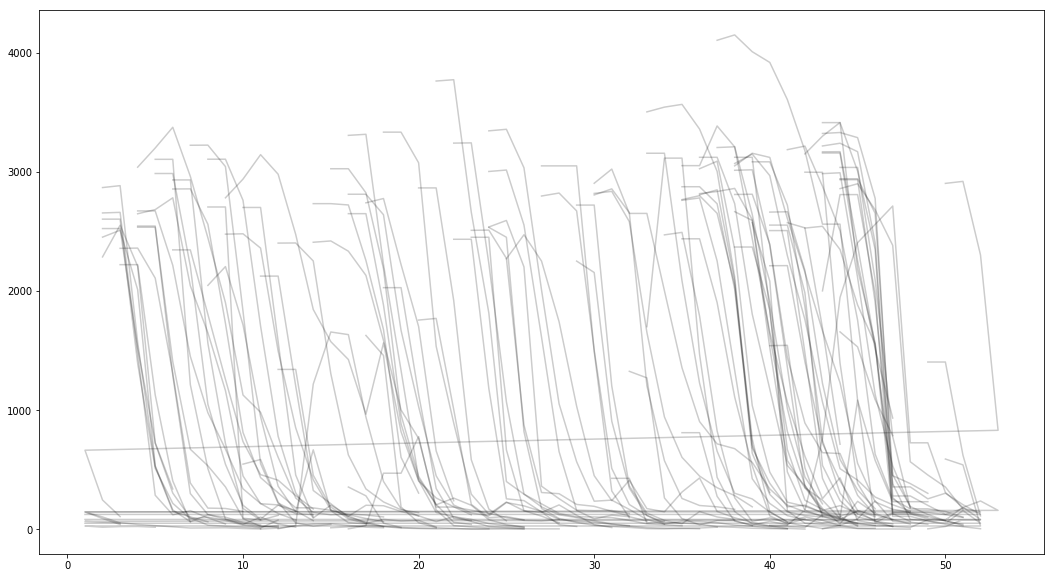

In [7]:
fig, ax = plt.subplots(figsize=(18, 10))

for movie in allofit:
    ax.plot(pd.DatetimeIndex(movie[2]['Thursday']).week, movie[2]['Theaters'], color='k', alpha=.2)

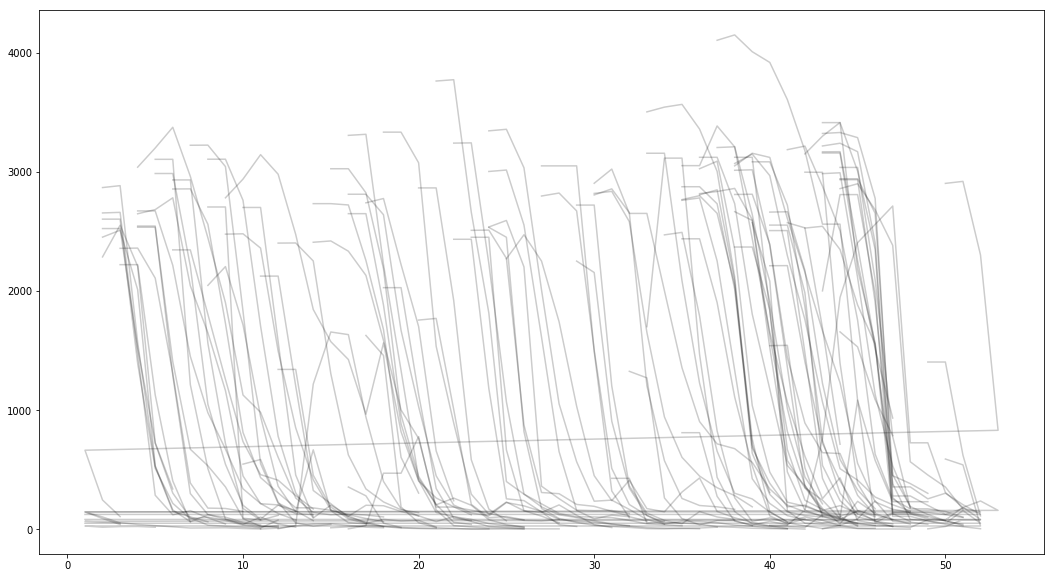

In [8]:
fig, ax = plt.subplots(figsize=(18, 10))

for movie in allofit:
    ax.plot(pd.DatetimeIndex(movie[2]['Thursday']).week, movie[2]['Theaters'], color='k', alpha=.2)

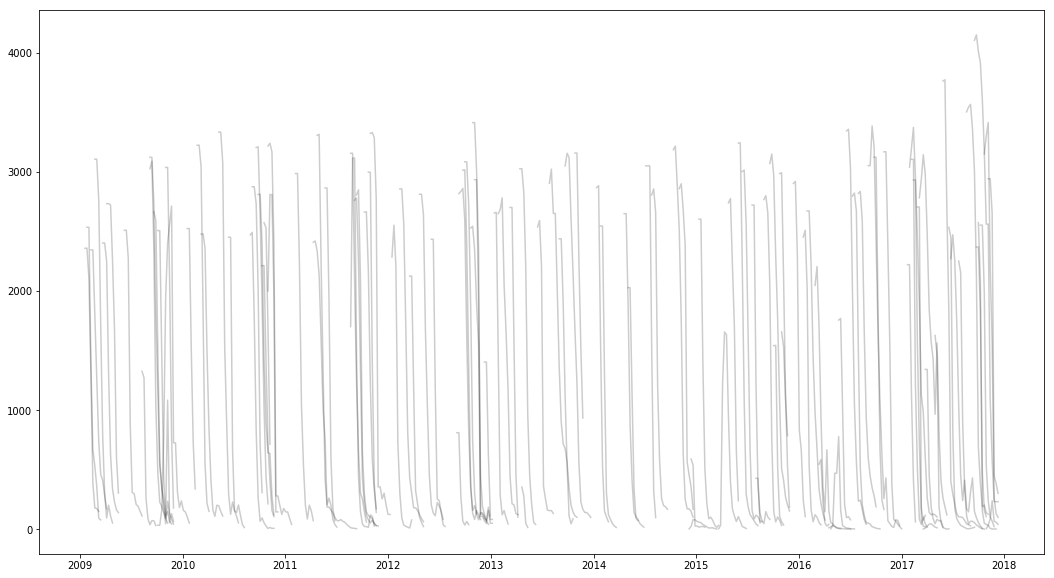

In [9]:
fig, ax = plt.subplots(figsize=(18, 10))

for movie in allofit:
    ax.plot(movie[2]['Thursday'], movie[2]['Theaters'], color='k', alpha=.2)

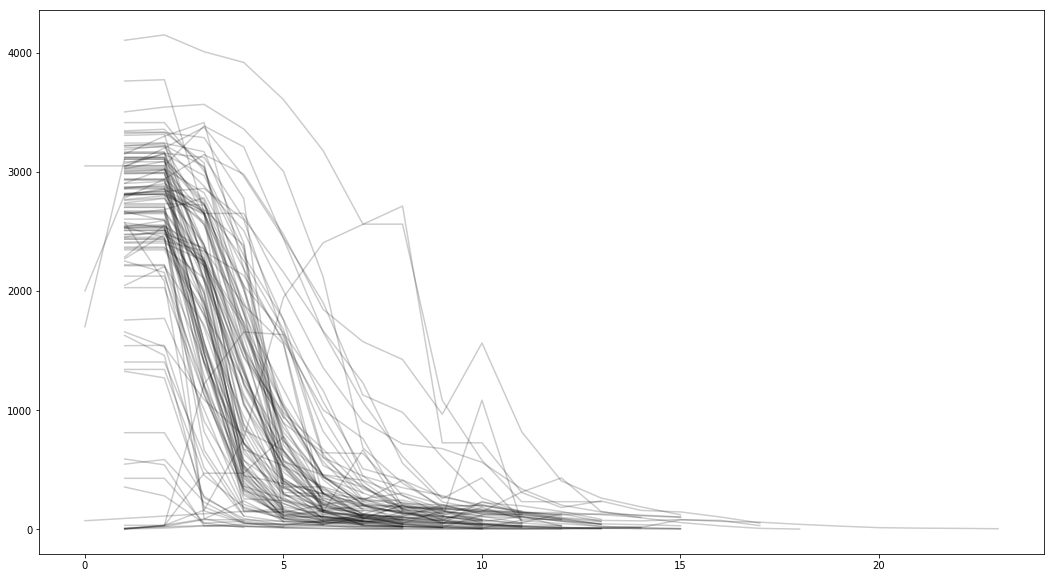

In [10]:
fig, ax = plt.subplots(figsize=(18, 10))

for movie in allofit:
    ax.plot(movie[2]['Week'], movie[2]['Theaters'], color='k', alpha=.2)

In [11]:
superDf = allofit[0][2]

superDf['Movie'] = allofit[0][0]
superDf['Budget'] = allofit[0][1]
superDf

,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,Thursday,Movie,Budget
Week,,,,,,,,,,,
1,6,16559630,NaN,2220,NaN,7459,16559630,1,2017-01-22,Bye Bye Man,7400000.0
2,11,4139020,-75.0,2220,NaN,1864,20698650,2,2017-01-29,Bye Bye Man,7400000.0
3,21,1345766,-67.5,1127,-1093.0,1194,22044416,3,2017-02-05,Bye Bye Man,7400000.0
4,32,282485,-79.0,405,-722.0,697,22326901,4,2017-02-12,Bye Bye Man,7400000.0
5,51,68905,-75.6,62,-343.0,1111,22395806,5,2017-02-19,Bye Bye Man,7400000.0


In [12]:
for movie in allofit[1:]:
    df = movie[2]
    df['Movie'] = movie[0]
    try:
        df['Budget'] = movie[1]
    except:
        df['Budget'] = np.nan
    superDf = superDf.append(df, ignore_index=True)

In [303]:
gb = superDf.groupby('Movie')

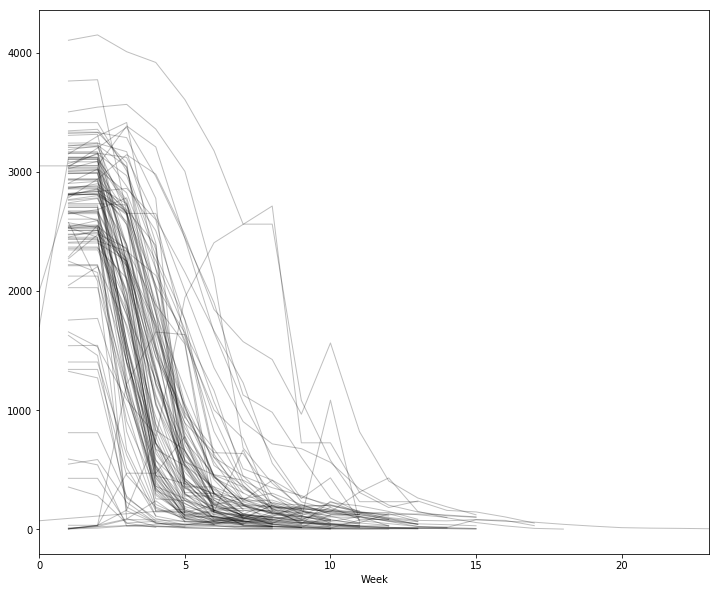

In [304]:
fig, ax = plt.subplots(figsize=(12, 10))
a = gb.plot(x='Week', y='Theaters', ax=ax, c='k', alpha=.25, linewidth=1)
ax.get_legend().set_visible(False)

In [305]:
fn = lambda x: x.cumsum() / x.sum()

superDf['pctOfTotal'] = gb['WeeklyGross'].apply(fn)

##### Late Bloomers

In [307]:
gb['pctOfTotal'].nth(5).sort_values().head()

Movie
The Babadook           0.811956
Paranormal Activity    0.823118
Get Out                0.905111
Raw                    0.920172
It Follows             0.930755
Name: pctOfTotal, dtype: float64

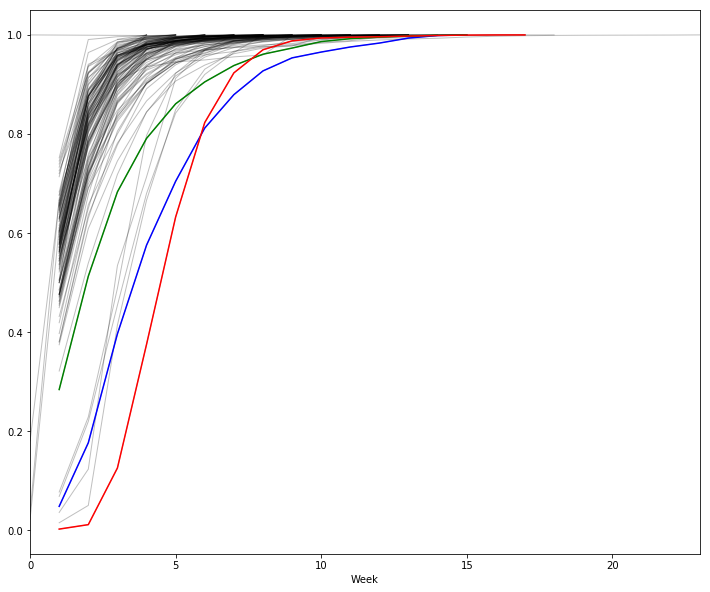

In [310]:
gb = superDf.groupby('Movie')
fig, ax = plt.subplots(figsize=(12, 10))
a = gb.plot(x='Week', y='pctOfTotal', ax=ax, c='k', alpha=.25, linewidth=1)
ax.get_legend().set_visible(False)


babadook = superDf[superDf['Movie'] == 'The Babadook']
ax.plot(babadook['Week'], babadook['pctOfTotal'], c='b')
getout = superDf[superDf['Movie'] == 'Get Out']
ax.plot(getout['Week'], getout['pctOfTotal'], c='g')
paranormal = superDf[superDf['Movie'] == 'Paranormal Activity']
ax.plot(paranormal['Week'], paranormal['pctOfTotal'], c='r')

### Box Office Successes

In [311]:
top5grossing = gb['WeeklyGross'].sum().sort_values(ascending=False).head().index

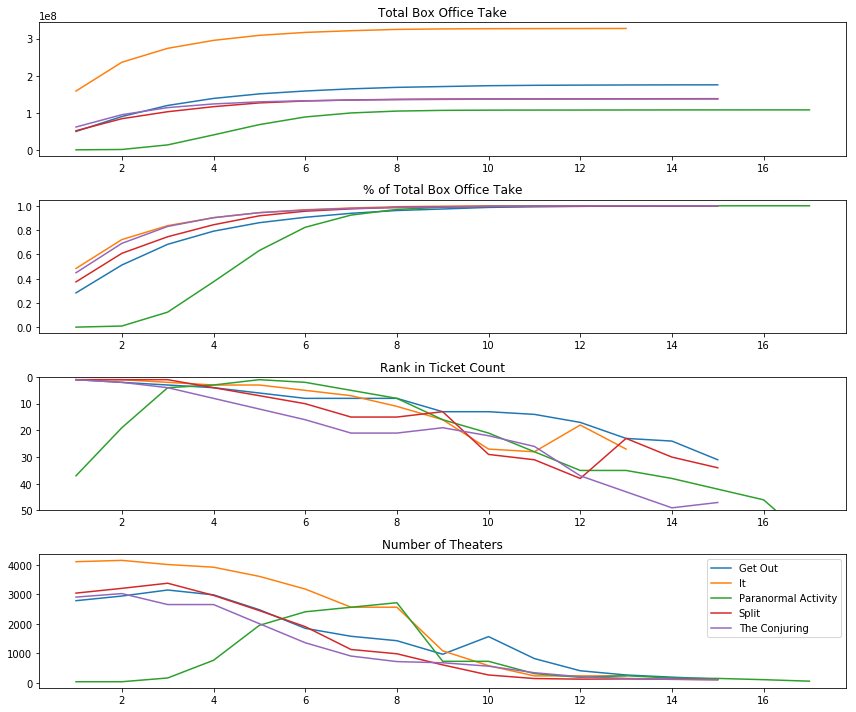

In [111]:
fig, axes = plt.subplots(4, figsize=(12, 10))
gb = superDf[superDf['Movie'].isin(top5grossing)].groupby('Movie')

for name, group in gb:
    axes[0].plot(group['Week'], group['WeeklyGross'].cumsum(), label=name)
    axes[1].plot(group['Week'], group['pctOfTotal'], label=name)
    axes[2].plot(group['Week'], group['Rank'], label=name)
    axes[3].plot(group['Week'], group['Theaters'], label=name)

axes[0].set_title('Total Box Office Take')
axes[1].set_title('% of Total Box Office Take')
axes[2].set_title('Rank in Ticket Count')
axes[3].set_title('Number of Theaters')

axes[2].set_ylim([50, 0])
plt.legend()
plt.tight_layout()

###  Budget and ROI

In [313]:
gb = superDf_budget.groupby('Movie')

superDf['Investment'] = gb['WeeklyGross'].cumsum() / superDf['Budget']
superDf_budget = superDf[~superDf['Budget'].isnull()]

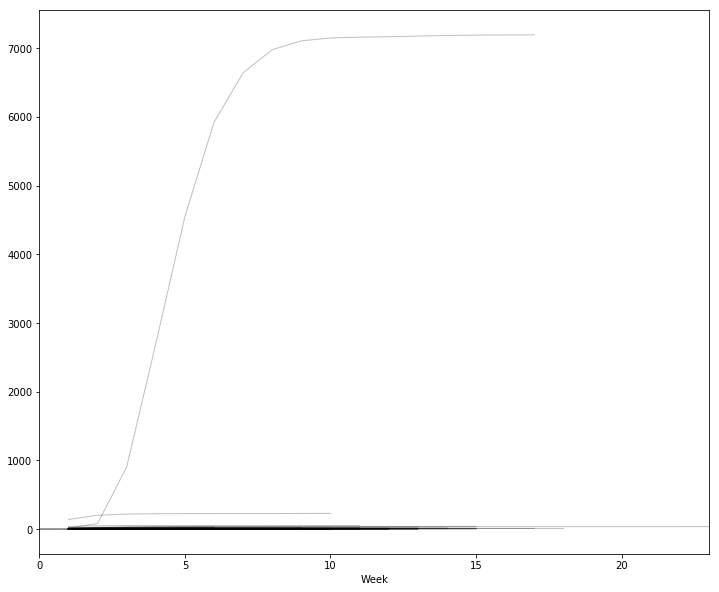

In [314]:
gb = superDf_budget.groupby('Movie')
fig, ax = plt.subplots(figsize=(12, 10))
a = gb.plot(x='Week', y='Investment', ax=ax, c='k', alpha=.25, linewidth=1)
ax.get_legend().set_visible(False)

In [362]:
outliers = ['Paranormal Activity', 'The Gallows', 'The Devil Inside'
           , 'Get Out', 'Insidious']
checking = superDf_budget[~superDf_budget['Movie'].isin(outliers)]

checking['Investment'].sort_values(ascending=False).head(5)

359    32.482090
358    32.253730
357    31.537320
356    29.530960
506    28.250969
Name: Investment, dtype: float64

In [363]:
superDf_budget.loc[393]

Rank                                 71
WeeklyGross                       16475
PctChangeWkGross                    194
Theaters                              4
DeltaTheaters                        -3
AvgRev                             4119
GrossToDate                 5.40092e+07
Week                                 23
Thursday            2011-09-11 00:00:00
Movie                         Insidious
Budget                          1.5e+06
pctOfTotal                            1
Investment                      36.0061
Name: 393, dtype: object

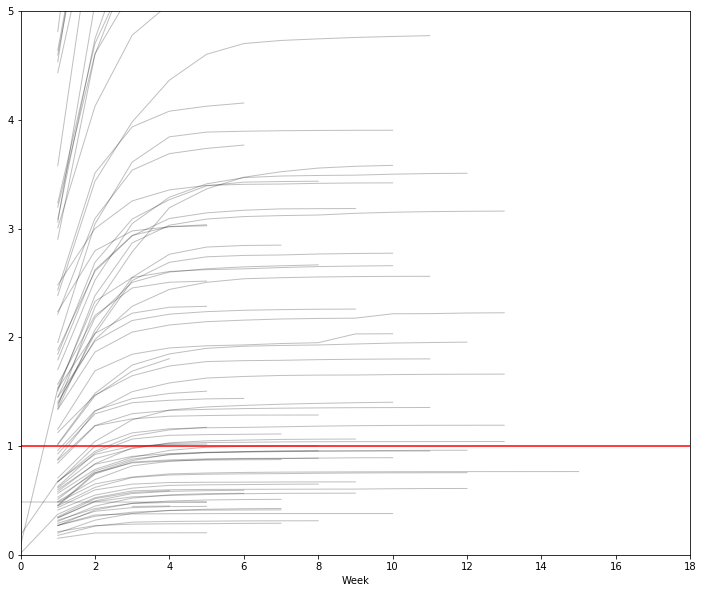

In [364]:
gb = checking.groupby('Movie')
fig, ax = plt.subplots(figsize=(12, 10))
a = gb.plot(x='Week', y='Investment', ax=ax, c='k', alpha=.25, linewidth=1)
ax.get_legend().set_visible(False)
ax.set_ylim(0, 5)
ax.axhline(1, c='r')

In [365]:
superDf[superDf['Week'] == 0]

,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,Thursday,Movie,Budget,pctOfTotal,Investment,Investment2
175,11.0,1700000.0,NaN,2000.0,NaN,850.0,1700000.0,0,2010-10-31,Saw 3D,20000000.0,0.037191,0.085000,NaN
606,10.0,5511852.0,NaN,3049.0,NaN,1808.0,5511852.0,0,2014-07-06,Deliver Us From Evil,30000000.0,0.180376,0.183728,NaN
893,NaN,45116.0,-74.8,71.0,-98.0,635.0,29137000.0,0,2011-06-26,Priest,60000000.0,1.000000,0.485617,NaN
925,29.0,400000.0,NaN,1700.0,NaN,235.0,400000.0,0,2011-08-21,Fright Night,30000000.0,0.021855,0.013333,NaN


###  Grouping by Final ROI

In [366]:
roi = lambda x: x['GrossToDate'].max() / x['Budget'].mean()

roiSeries = superDf_budget.groupby('Movie').apply(roi)

flops = roiSeries[roiSeries<1]
flops.index

Index(['A Cure For Wellness', 'Alien Covenant', 'Case 39', 'Crimson Peak',
       'Don't Be Afraid of the Dark', 'Dream House', 'Flatliners',
       'Friend Request', 'Fright Night', 'Lords of Salem', 'Mother',
       'My Soul to Take', 'Pandorum', 'Priest', 'Resident Evil 5',
       'Resident Evil 6', 'Scream 4', 'Shark Night 3D', 'Silent Hill 2',
       'Sorority Row', 'Splice', 'The Apparition', 'The Rite', 'The Thing',
       'The Wolfman'],
      dtype='object', name='Movie')

In [405]:
bins = pd.Series(pd.qcut(roiSeries, 7, labels=range(7, 0, -1)), name='Ntiles').to_frame()
superDf_budget = superDf_budget.merge(bins, left_on='Movie', right_index=True)

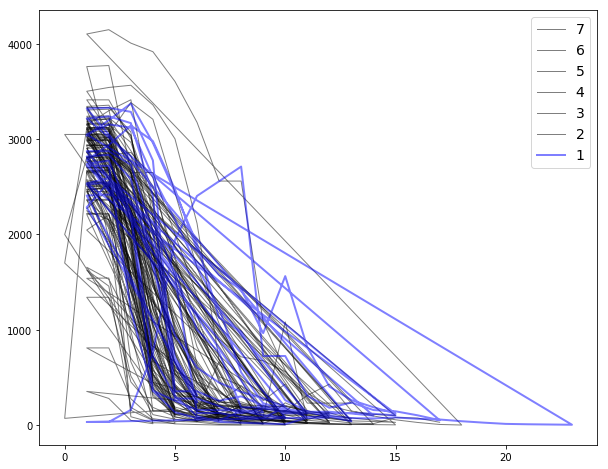

In [429]:
fig, ax = plt.subplots(figsize=(10, 8))

gb = superDf_budget.groupby('Ntiles')
for name, group in gb:
    if name == 1:
        kwargs = {'color':'b', 'linewidth':2}
    else: 
        kwargs = {'color':'k', 'linewidth':1}
    ax.plot(group['Week'], group['Theaters'], label=name, alpha=.5, **kwargs)
    
plt.legend(fontsize=14)

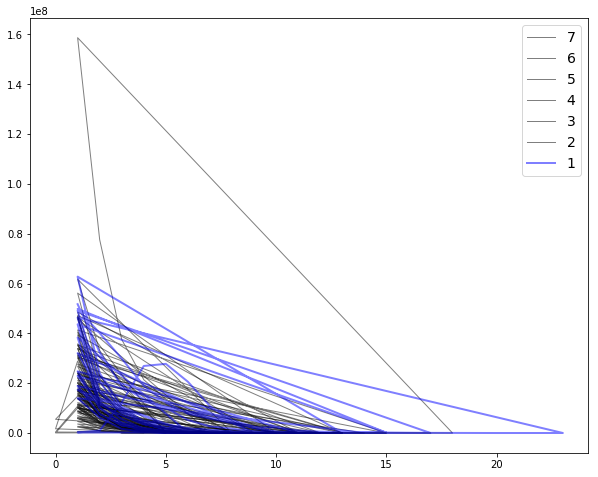

In [431]:
fig, ax = plt.subplots(figsize=(10, 8))

gb = superDf_budget.groupby('Ntiles')
for name, group in gb:
    if name == 1:
        kwargs = {'color':'b', 'linewidth':2}
    else: 
        kwargs = {'color':'k', 'linewidth':1}
    ax.plot(group['Week'], group['WeeklyGross'], label=name, alpha=.5, **kwargs)
    
plt.legend(fontsize=14)

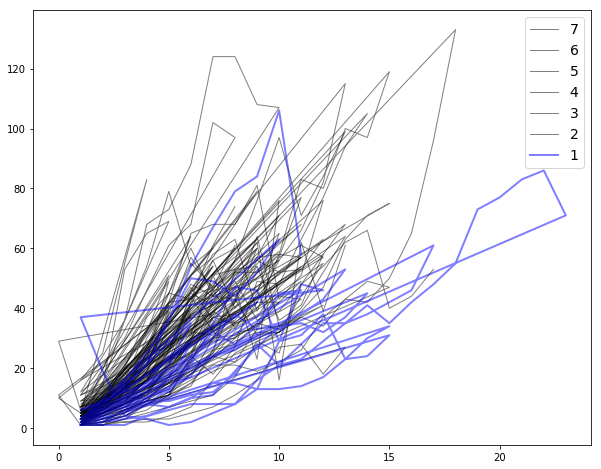

In [433]:
fig, ax = plt.subplots(figsize=(10, 8))

gb = superDf_budget.groupby('Ntiles')
for name, group in gb:
    if name == 1:
        kwargs = {'color':'b', 'linewidth':2}
    else: 
        kwargs = {'color':'k', 'linewidth':1}
    ax.plot(group['Week'], group['Rank'], label=name, alpha=.5, **kwargs)
    
plt.legend(fontsize=14)

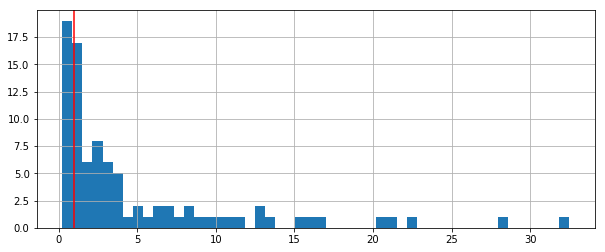

In [300]:
ax = roiSeries[~roiSeries.index.isin(outliers)].hist(bins=50)
ax.axvline(1, color='r')
plt.gcf().set_figwidth(10)

### Franchises

In [168]:
insidious = superDf[superDf['Movie'].str.contains('Insidious')]

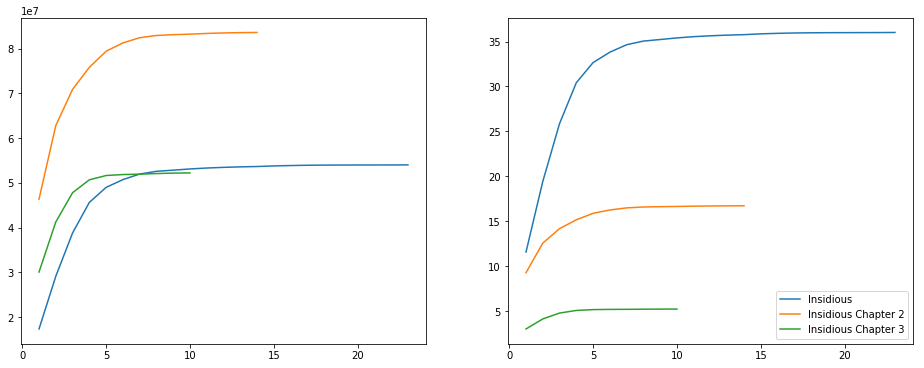

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for name, group in insidious.groupby('Movie'):
    axes[0].plot(group['Week'], group['GrossToDate'], label=name)
    axes[1].plot(group['Week'], group['Investment'], label=name)
    
plt.legend()